In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from datasets import Dataset

In [2]:
colors_set = ['#40512D', '#5C733F', '#789451', '#A5A553', '#FFC857', '#E96356', '#714C3D', '#965369', '#B171CE', '#523646', '#793CEA']

In [3]:
# load data
videos = Dataset.load_from_disk('../data/videos')
# load labels
labels = np.load('../data/cluster_labels.npy')

In [4]:
df = pd.DataFrame(videos)
df['label'] = labels

In [21]:
shorts = []
for index, row in df.iterrows():
        if row['channel'] == 'Al-Jazeera-English':
                shorts.append('Al-Jazeera')
        if row['channel'] == 'BBC-News':
                shorts.append('BBC')
        if row['channel'] == 'CCTV-Video-News-Agency':
                shorts.append('CCTV')
        if row['channel'] == 'CNN-News':
                shorts.append('CNN')
        if row['channel'] == 'DW-News':
                shorts.append('DW')
        if row['channel'] == 'Fox-News':
                shorts.append('Fox')
df['Channel Tag'] = shorts

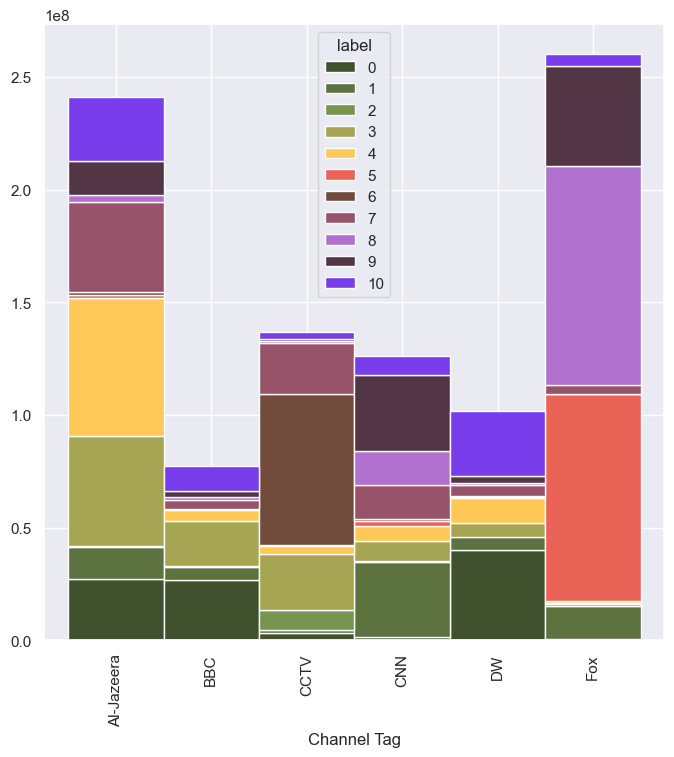

In [22]:
seaborn.set()
ag = df.groupby(['Channel Tag','label']).sum().unstack()
ag.columns = ag.columns.droplevel()

ag.plot(kind='bar',
        # colormap=cm.Accent,
        width=1,
        figsize=(8,8),
        color=colors_set,
        stacked=True
        )
plt.show()